# Object Detection for Social Spiders using YOLO11

## Importing libraries and dependencies

In [1]:
import os
HOME = os.getcwd()
print(HOME)

c:\Coding\MOT-yolo11


In [2]:
%pip install ultralytics 

Note: you may need to restart the kernel to use updated packages.


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.55  Python-3.11.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Setup complete  (16 CPUs, 15.2 GB RAM, 761.0/803.0 GB disk)


In [4]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
%pip install pickleshare

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip show roboflow

Name: roboflow
Version: 1.1.50
Summary: Official Python package for working with the Roboflow API
Home-page: https://github.com/roboflow-ai/roboflow-python
Author: Roboflow
Author-email: support@roboflow.com
License: UNKNOWN
Location: c:\Coding\MOT-yolo11\motenv\Lib\site-packages
Requires: certifi, cycler, filetype, idna, kiwisolver, matplotlib, numpy, opencv-python-headless, Pillow, python-dateutil, python-dotenv, PyYAML, requests, requests-toolbelt, six, tqdm, urllib3
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
print(torch.version.cuda)  # Should print the CUDA version
print(torch.cuda.is_available())  # Should print True if GPU is available

12.4
True


## Importing the dataset from Roboflow

In [12]:
dir_name = "dataset"
os.makedirs(dir_name, exist_ok=True)
%cd {dir_name}

from roboflow import Roboflow
rf = Roboflow(api_key="Enter_API_key")
project = rf.workspace("workspace_name").project("project_name")
version = project.version
dataset = version.download("yolov11")

c:\Coding\MOT-yolo11\dataset
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Social-Spiders-Tracking-4 in yolov11:: 100%|██████████| 2392/2392 [00:01<00:00, 1249.88it/s]


## Training the Model

In [23]:
%cd ..

c:\Coding\MOT-YOLO11


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = YOLO("yolo11l.pt").to(device)
results = model.train(data="dataset/Social-Spiders-Tracking-4/data.yaml", batch=4, epochs=50, imgsz=960, plots=True)

engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=dataset/Social-Spiders-Tracking-4/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=960, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimiz

train: Scanning C:\Coding\MOT-yolo11\dataset\Social-Spiders-Tracking-4\train\labels.cache... 1180 images, 48 backgrounds, 0 corrupt: 100%|██████████| 1180/1180 [00:00<?, ?it/s]
val: Scanning C:\Coding\MOT-yolo11\dataset\Social-Spiders-Tracking-4\valid\labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to c:\Coding\MOT-yolo11\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to c:\Coding\MOT-yolo11\runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.56G      2.015      1.787      1.881         19        960: 100%|██████████| 295/295 [01:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all          5         11       0.83      0.636      0.708      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.77G      1.997      1.488      1.994         25        960: 100%|██████████| 295/295 [01:43<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all          5         11       0.25      0.545      0.219      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.77G      1.966      1.492      1.918         28        960: 100%|██████████| 295/295 [06:32<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all          5         11      0.919      0.455      0.687      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.76G      1.937        1.4      1.892         37        960: 100%|██████████| 295/295 [02:17<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all          5         11      0.694      0.636      0.805      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.75G      1.899      1.254      1.894         16        960: 100%|██████████| 295/295 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


                   all          5         11          1      0.812      0.956       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.77G      1.893      1.241      1.878         16        960: 100%|██████████| 295/295 [01:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all          5         11      0.921      0.727      0.837      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.77G      1.825      1.169      1.816         20        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          5         11      0.872      0.909      0.944      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.75G      1.807       1.11       1.84         15        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          5         11          1      0.713      0.769      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.73G      1.809      1.093      1.825         29        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all          5         11      0.915      0.983      0.972      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.77G        1.8      1.083      1.814         18        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          5         11      0.982          1      0.995      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.76G      1.801      1.046      1.808         29        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          5         11      0.905          1      0.988      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.76G      1.796       1.03       1.79         23        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          5         11      0.899      0.812       0.92      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.77G      1.766     0.9876      1.791         22        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all          5         11      0.955      0.727      0.864      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.75G      1.739     0.9714      1.758         24        960: 100%|██████████| 295/295 [01:40<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          5         11      0.789      0.818      0.866      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.76G      1.721     0.9589      1.759         28        960: 100%|██████████| 295/295 [01:38<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          5         11      0.757      0.909      0.888      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.76G      1.706      0.969      1.761         16        960: 100%|██████████| 295/295 [01:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all          5         11      0.988      0.818      0.967      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.77G      1.704     0.9312      1.773         24        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all          5         11      0.839          1      0.973      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.77G      1.674     0.9162      1.741         29        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          5         11      0.906      0.883      0.893      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.77G      1.684     0.8993      1.753         18        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          5         11      0.972          1      0.995      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.78G      1.687     0.9169      1.749         38        960: 100%|██████████| 295/295 [01:40<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          5         11      0.996      0.909      0.988      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.77G      1.659     0.8685      1.734         26        960: 100%|██████████| 295/295 [01:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all          5         11      0.905      0.909      0.938       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.77G      1.667     0.8831      1.719         24        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all          5         11       0.99          1      0.995      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.76G      1.627     0.8432      1.693         41        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          5         11      0.901      0.909      0.951      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.77G      1.613      0.843      1.699         14        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          5         11      0.878      0.909      0.942      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.73G      1.618     0.8366      1.693         21        960: 100%|██████████| 295/295 [01:40<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all          5         11          1      0.998      0.995      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.77G       1.62     0.8083      1.683         42        960: 100%|██████████| 295/295 [01:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all          5         11      0.897      0.909      0.892      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.76G      1.595     0.8252      1.669         28        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          5         11      0.895          1      0.988      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.77G      1.589     0.8023      1.661          8        960: 100%|██████████| 295/295 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all          5         11          1      0.984      0.995        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.76G      1.571     0.7983      1.659         17        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          5         11      0.888      0.909      0.897      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.75G      1.567     0.7751       1.65         19        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          5         11          1       0.97      0.995      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.75G      1.583     0.7906      1.665         20        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          5         11      0.902          1      0.988      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.76G      1.568     0.7613      1.651         32        960: 100%|██████████| 295/295 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          5         11      0.987          1      0.995      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.77G      1.527      0.756       1.63         29        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          5         11      0.819      0.909      0.956       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.76G      1.529     0.7365      1.632         45        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all          5         11      0.899      0.818      0.923      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.76G      1.501     0.7205      1.594         16        960: 100%|██████████| 295/295 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all          5         11      0.844          1      0.965      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.74G      1.514     0.7435      1.624         13        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          5         11      0.914          1      0.988      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.75G      1.475     0.7133       1.58         22        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          5         11      0.951      0.818      0.937      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.74G      1.499      0.722      1.596         17        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all          5         11      0.904      0.863      0.901      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.76G      1.462     0.6959      1.572         16        960: 100%|██████████| 295/295 [01:41<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all          5         11      0.909          1      0.988      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.77G      1.431     0.6853      1.557         29        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          5         11      0.909          1      0.988      0.607


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.73G      1.433      0.656      1.632         15        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all          5         11      0.903      0.853      0.904      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.77G      1.418     0.6358      1.618         12        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          5         11      0.994      0.818      0.927      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.78G        1.4      0.627      1.603         20        960: 100%|██████████| 295/295 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all          5         11      0.911          1      0.988      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.76G      1.384     0.6152       1.59         20        960: 100%|██████████| 295/295 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all          5         11          1      0.817      0.832       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.77G      1.365      0.602       1.58         26        960: 100%|██████████| 295/295 [01:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          5         11      0.908          1       0.98      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.77G      1.341     0.6011      1.554         10        960: 100%|██████████| 295/295 [01:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all          5         11       0.91          1      0.988      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.76G      1.349     0.5934      1.541         10        960: 100%|██████████| 295/295 [01:40<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          5         11      0.913          1       0.98      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.75G       1.31     0.5771      1.539         19        960: 100%|██████████| 295/295 [01:41<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          5         11      0.912          1      0.988      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.75G      1.308     0.5701       1.54         24        960: 100%|██████████| 295/295 [01:42<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          5         11      0.828      0.909      0.931      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.76G      1.297     0.5759      1.529         18        960: 100%|██████████| 295/295 [01:40<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          5         11      0.829      0.909      0.931      0.574



50 epochs completed in 1.521 hours.
Optimizer stripped from c:\Coding\MOT-yolo11\runs\detect\train\weights\last.pt, 51.3MB
Optimizer stripped from c:\Coding\MOT-yolo11\runs\detect\train\weights\best.pt, 51.3MB

Validating c:\Coding\MOT-yolo11\runs\detect\train\weights\best.pt...
Ultralytics 8.3.55  Python-3.11.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


                   all          5         11      0.914          1      0.988      0.636
Speed: 0.7ms preprocess, 41.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to c:\Coding\MOT-yolo11\runs\detect\train


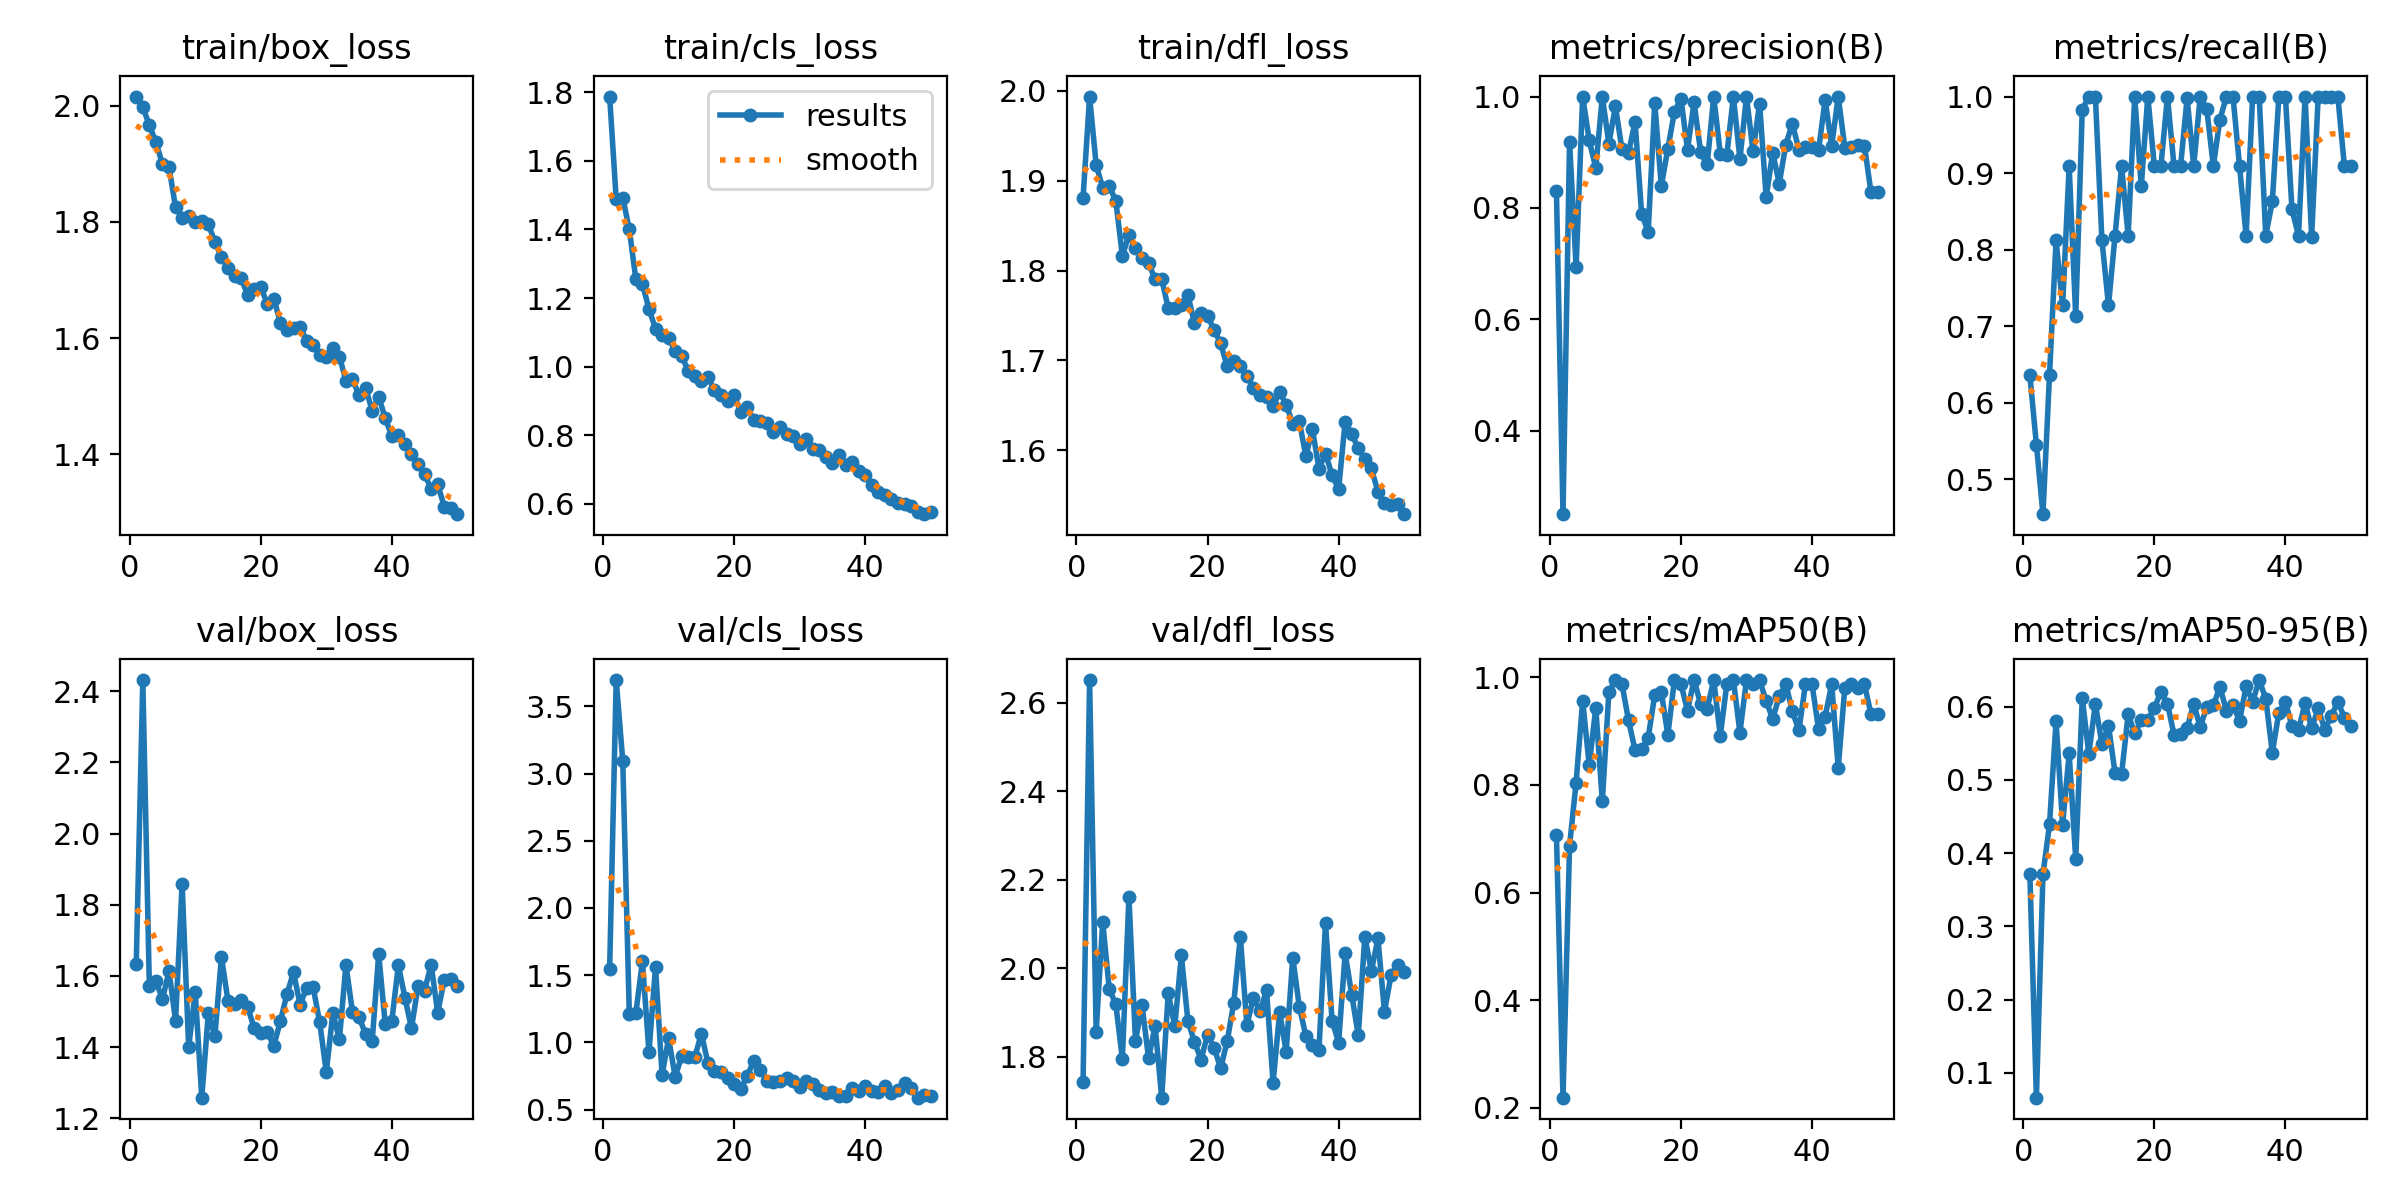

In [12]:
Image(filename='runs/detect/train/results.png')

Mean Average Precision (mAP50) of 0.988 achieved